In [1]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import arviz as az
from sklearn.datasets import make_regression




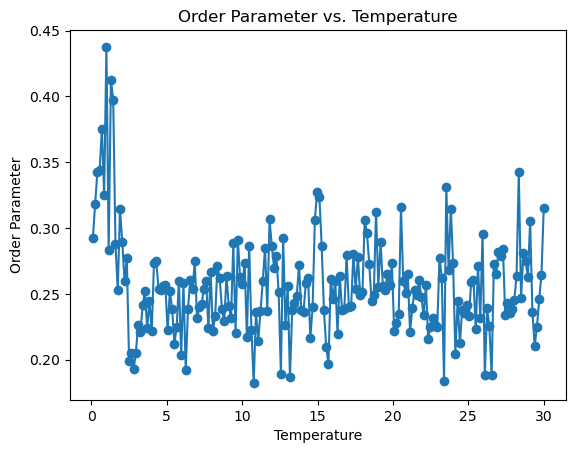

In [5]:
# Constants
N = 20  # Grid size
num_steps = 10000  # Number of Monte Carlo steps
epsilon = 1.0  # Interaction strength
k_B = 1.0  # Boltzmann constant

# Initialize grid with random orientations (angles in radians)
directors = np.random.rand(N, N) * 2 * np.pi  # Random angles in [0, 2π]

# Define shifts for periodic boundary conditions
shifts = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def calculate_energy(directors):
    cos_theta = np.cos(directors)
    sin_theta = np.sin(directors)
    energy = np.zeros_like(directors)

    for dx, dy in shifts:
        cos_shifted = np.roll(cos_theta, shift=(dx, dy), axis=(0, 1))
        sin_shifted = np.roll(sin_theta, shift=(dx, dy), axis=(0, 1))
        cos_diff = cos_theta * cos_shifted + sin_theta * sin_shifted
        energy += -epsilon * (cos_diff**2 - 1/3)
    
    return np.sum(energy)

def monte_carlo_step(directors, temperature):
    i, j = np.random.randint(0, N, 2)
    current_angle = directors[i, j]
    proposed_angle = np.random.rand() * 2 * np.pi
    current_energy = calculate_energy(directors)
    directors[i, j] = proposed_angle  # Temporarily update
    new_energy = calculate_energy(directors)
    delta_E = new_energy - current_energy
    
    if delta_E > 0 and np.random.rand() >= np.exp(-delta_E / (k_B * temperature)):
        directors[i, j] = current_angle  # Revert change if not accepted

def calculate_order_parameter(directors):
    cos_theta = np.cos(directors)
    order_parameter = np.mean((3 * cos_theta**2 - 1) / 2)
    return order_parameter

# Simulation parameters
temperatures = np.linspace(0.1, 30, 200)
order_parameters = []

for T in temperatures:
    for step in range(num_steps):
        monte_carlo_step(directors, T)
    S = calculate_order_parameter(directors)
    order_parameters.append(S)

# Plot results
plt.plot(temperatures, order_parameters, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.title('Order Parameter vs. Temperature')
plt.show()


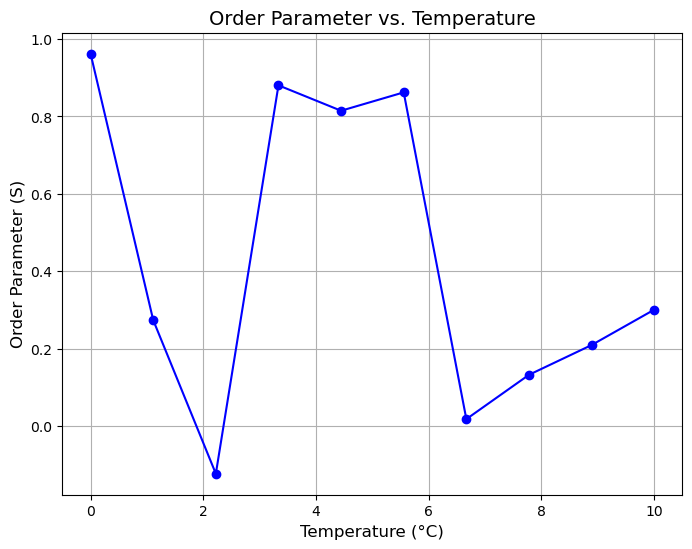

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 5  # Grid size
num_steps = 50000  # Number of Monte Carlo steps
epsilon = 0.1  # Interaction strength (arbitrary units)
k_B = 1.38e-23  # Boltzmann constant (J/K)
delta_theta = 0.2  # Small angle increment for stepwise rotation

# Define shifts for periodic boundary conditions
shifts = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def calculate_local_energy(directors, i, j):
    cos_theta = np.cos(directors)
    sin_theta = np.sin(directors)
    energy = 0

    for dx, dy in shifts:
        neighbor_i = (i + dx) % N
        neighbor_j = (j + dy) % N
        cos_diff = (cos_theta[i, j] * cos_theta[neighbor_i, neighbor_j] +
                    sin_theta[i, j] * sin_theta[neighbor_i, neighbor_j])
        energy += -epsilon * (cos_diff**2 - 1/3)

    return energy

def monte_carlo_step(directors, temperature, delta_theta):
    i, j = np.random.randint(0, N, 2)
    current_angle = directors[i, j]

    # Randomly choose clockwise or counterclockwise step
    if np.random.rand() > 0:
        proposed_angle = current_angle + delta_theta  # Clockwise
    else:
        proposed_angle = current_angle - delta_theta  # Counterclockwise
    
    # Ensure proposed_angle stays within [0, 2π]
    proposed_angle = proposed_angle % (2 * np.pi)

    # Calculate energy before and after the proposed change
    current_energy = calculate_local_energy(directors, i, j)
    directors[i, j] = proposed_angle  # Temporarily update
    new_energy = calculate_local_energy(directors, i, j)
    delta_E = new_energy - current_energy

    # Metropolis criterion for acceptance
    if delta_E > 0 and np.random.rand() > (temperature-273)/10:
        directors[i, j] = current_angle  # Revert change if not accepted

def calculate_order_parameter(directors):
    cos_theta = np.cos(directors)
    P2 = (3 * cos_theta**2 - 1) / 2
    S = np.mean(P2)
    return S

# Convert temperature range from Celsius to Kelvin
temperature_range_Celsius = np.linspace(0, 10, 10)
temperature_range_Kelvin = temperature_range_Celsius + 273

# Initialize grid with random orientations (angles in radians)
initial_directors = np.random.rand(N, N) * 2 * np.pi

# Simulation parameters
order_parameters = []

# Perform Monte Carlo simulation
for T in temperature_range_Kelvin:
    # Use the same initial orientation for each temperature
    directors = initial_directors.copy()
    
    for step in range(num_steps):
        monte_carlo_step(directors, T, delta_theta)
    
    S = calculate_order_parameter(directors)
    order_parameters.append(S)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(temperature_range_Celsius, order_parameters, marker='o', linestyle='-', color='b')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Order Parameter (S)', fontsize=12)
plt.title('Order Parameter vs. Temperature', fontsize=14)
plt.grid(True)
plt.show()


In [181]:
directors = np.random.rand(N, N) * np.pi * 2 

cos_theta = np.cos(directors)
P2 = (3 * cos_theta**2 - 1) / 2
S = np.mean(P2)
S



0.2552450749429615

In [177]:
directors = np.random.rand(N, N) * np.pi

cos_theta = np.cos(directors)
np.mean(cos_theta**2)

0.500490700660173

In [195]:
directors = np.full((N, N), 20.0) * 2* np.pi
directors

array([[20., 20., 20., ..., 20., 20., 20.],
       [20., 20., 20., ..., 20., 20., 20.],
       [20., 20., 20., ..., 20., 20., 20.],
       ...,
       [20., 20., 20., ..., 20., 20., 20.],
       [20., 20., 20., ..., 20., 20., 20.],
       [20., 20., 20., ..., 20., 20., 20.]])

In [196]:
cos_theta = np.cos(directors)
P2 = (3 * cos_theta**2 - 1) / 2
S = np.mean(P2)
S

-0.25020354623919644

# Simplest case of cods with parallel and perpendicular orientation

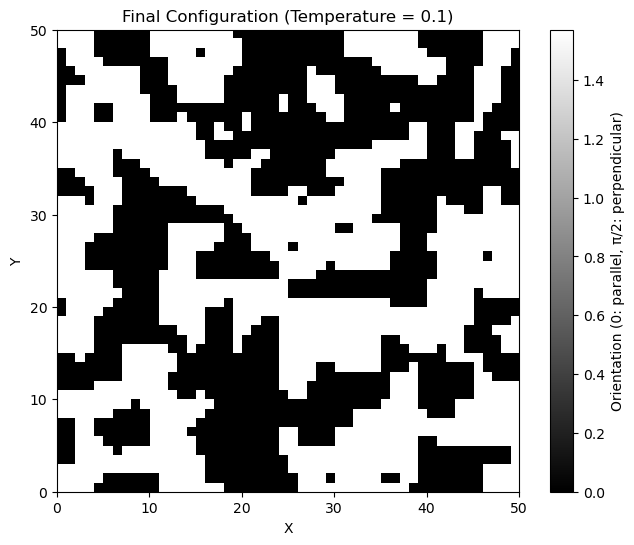

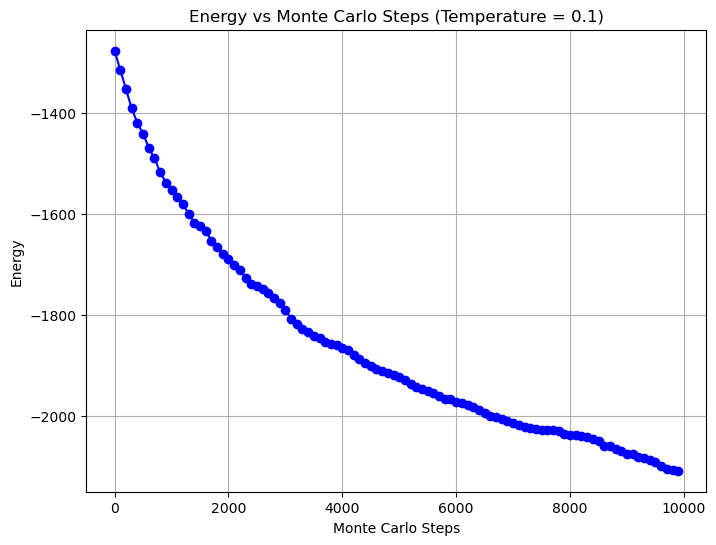

In [247]:
# Constants
N = 50  # Size of the grid (N x N)
epsilon = 1.0  # Interaction strength
temperature = 0.1  # Temperature parameter
steps = 10000  # Number of Monte Carlo steps

# Initialize directors with random orientations
directors = np.random.choice([0, np.pi/2], size=(N, N))  # 0 radians (parallel), pi/2 radians (perpendicular)

# Function to calculate energy contributions for each site
def calculate_energy_contributions(directors):
    cos_theta = np.cos(directors)
    sin_theta = np.sin(directors)
    right_cos_diff = cos_theta * np.roll(cos_theta, -1, axis=1) + sin_theta * np.roll(sin_theta, -1, axis=1)
    up_cos_diff = cos_theta * np.roll(cos_theta, -1, axis=0) + sin_theta * np.roll(sin_theta, -1, axis=0)
    energy = -epsilon * (right_cos_diff + up_cos_diff)
    return energy

# Function to calculate total energy of the system
def calculate_total_energy(energy_contributions):
    return np.sum(energy_contributions) / 2  # Each interaction is counted twice, so divide by 2

# Function to perform Monte Carlo step
def monte_carlo_step(directors, temperature):
    i, j = np.random.randint(N), np.random.randint(N)  # Randomly select a site
    
    # Calculate current energy contributions
    energy_contributions = calculate_energy_contributions(directors)
    current_energy = calculate_total_energy(energy_contributions)
    
    # Flip orientation (toggle between 0 and pi/2)
    new_directors = directors.copy()
    new_directors[i, j] = np.pi/2 if directors[i, j] == 0 else 0
    
    # Calculate new energy contributions
    new_energy_contributions = calculate_energy_contributions(new_directors)
    new_energy = calculate_total_energy(new_energy_contributions)
    
    # Metropolis criterion
    delta_E = new_energy - current_energy
    if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / temperature):
        directors[i, j] = new_directors[i, j]  # Accept the change
    
    return directors

# Function to run Monte Carlo simulation
def run_simulation(steps, temperature):
    directors = np.random.choice([0, np.pi/2], size=(N, N))  # Initialize with random orientations
    energies = []

    for step in range(steps):
        directors = monte_carlo_step(directors, temperature)
        if (step + 1) % 100 == 0:
            energy_contributions = calculate_energy_contributions(directors)
            energies.append(calculate_total_energy(energy_contributions))
    
    return directors, energies

# Run simulation
directors_final, energies = run_simulation(steps, temperature)

# Plotting the final configuration
plt.figure(figsize=(8, 6))
plt.imshow(directors_final, cmap='gray', origin='lower', extent=(0, N, 0, N))
plt.title(f'Final Configuration (Temperature = {temperature})')
plt.colorbar(label='Orientation (0: parallel, π/2: perpendicular)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plotting the energy evolution
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(energies)) * 100, energies, marker='o', linestyle='-', color='b')
plt.title(f'Energy vs Monte Carlo Steps (Temperature = {temperature})')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


# Steps of 45 degrees

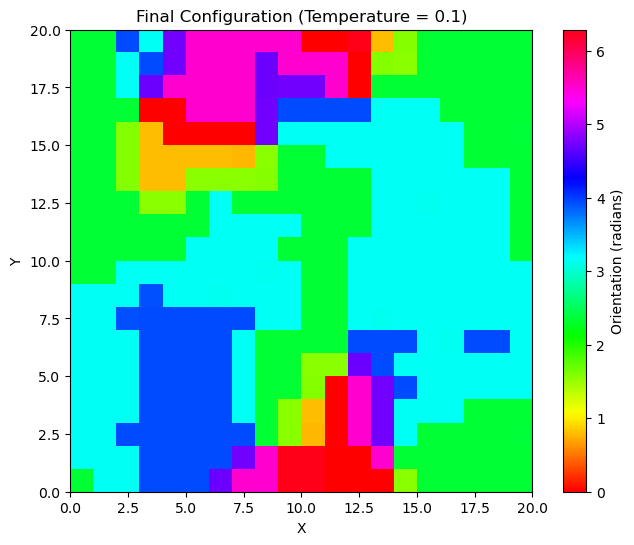

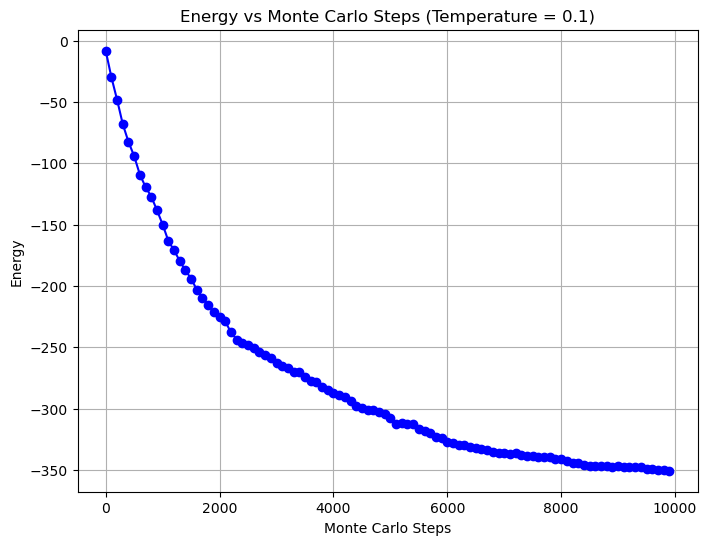

In [263]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 20  # Size of the grid (N x N)
epsilon = 1.0  # Interaction strength
temperature = 0.1  # Temperature parameter
steps = 10000  # Number of Monte Carlo steps

# Possible director angles in radians (0°, 45°, 90°, 135°, 180°, 225°, 270°, 315°)
angles = np.deg2rad(np.arange(0,360,45))

# Initialize directors with random orientations
directors = np.random.choice(angles, size=(N, N))

# Function to calculate energy contributions for each site
def calculate_energy_contributions(directors):
    cos_theta = np.cos(directors)
    sin_theta = np.sin(directors)
    right_cos_diff = cos_theta * np.roll(cos_theta, -1, axis=1) + sin_theta * np.roll(sin_theta, -1, axis=1)
    up_cos_diff = cos_theta * np.roll(cos_theta, -1, axis=0) + sin_theta * np.roll(sin_theta, -1, axis=0)
    energy = -epsilon * (right_cos_diff + up_cos_diff)
    return energy

# Function to calculate total energy of the system
def calculate_total_energy(energy_contributions):
    return np.sum(energy_contributions) / 2  # Each interaction is counted twice, so divide by 2

# Function to perform Monte Carlo step
def monte_carlo_step(directors, temperature):
    i, j = np.random.randint(N), np.random.randint(N)  # Randomly select a site
    
    # Calculate current energy contributions
    energy_contributions = calculate_energy_contributions(directors)
    current_energy = calculate_total_energy(energy_contributions)
    
    # Flip orientation (rotate by ±45 degrees)
    current_angle = directors[i, j]
    new_angle = current_angle + np.pi / 4 * np.random.choice([-1, 1])
    new_angle = (new_angle + 2 * np.pi) % (2 * np.pi)  # Ensure angle is within [0, 2π)
    
    new_directors = directors.copy()
    new_directors[i, j] = new_angle
    
    # Calculate new energy contributions
    new_energy_contributions = calculate_energy_contributions(new_directors)
    new_energy = calculate_total_energy(new_energy_contributions)
    
    # Metropolis criterion
    delta_E = new_energy - current_energy
    if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / temperature):
        directors[i, j] = new_angle  # Accept the change
    
    return directors

# Function to run Monte Carlo simulation
def run_simulation(steps, temperature):
    directors = np.random.choice(angles, size=(N, N))  # Initialize with random orientations
    energies = []

    for step in range(steps):
        directors = monte_carlo_step(directors, temperature)
        if (step + 1) % 100 == 0:
            energy_contributions = calculate_energy_contributions(directors)
            energies.append(calculate_total_energy(energy_contributions))
    
    return directors, energies

# Run simulation
directors_final, energies = run_simulation(steps, temperature)

# Plotting the final configuration
plt.figure(figsize=(8, 6))
plt.imshow(directors_final, cmap='hsv', origin='lower', extent=(0, N, 0, N))
plt.title(f'Final Configuration (Temperature = {temperature})')
plt.colorbar(label='Orientation (radians)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plotting the energy evolution
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(energies)) * 100, energies, marker='o', linestyle='-', color='b')
plt.title(f'Energy vs Monte Carlo Steps (Temperature = {temperature})')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


In [260]:
np.arange(0,360,90)

array([  0,  90, 180, 270])